In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import zipfile
import datetime
import matplotlib.pyplot as plt
import pylab as pl
from descartes import PolygonPatch
import random
from scipy.cluster.vq import kmeans2
import scipy.cluster as scp
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

In [6]:
#open my shapefile
zipdata = gpd.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
zipdata['zip'] = zipdata.postalCode.astype(int)


In [7]:
#open files and merge
files = 'zbp'+'94'+'totals.zip' 
zipf = zipfile.ZipFile(files)
df = pd.read_csv(zipf.open(files.replace('.zip','.txt')))[['zip','est']]
df.columns = [['zip','est'+'_'+'94']]

for yr in ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','95','96','97','98','99']:
    fname = 'zbp'+yr+'totals.zip' 
    zipf = zipfile.ZipFile(fname)
    try:
        dframe = pd.read_csv(zipf.open(fname.replace('.zip','.txt')))[['zip','est']]
    except KeyError:
        dframe = pd.read_csv(zipf.open(fname.replace('.zip','.txt')))[['ZIP','EST']]  
        
    dframe.columns = [['zip','est'+'_'+yr]]
    df = pd.merge(df,dframe,on='zip')
    
df.head()

,zip,est_94,est_00,est_01,est_02,est_03,est_04,est_05,est_06,est_07,...,est_09,est_10,est_11,est_12,est_13,est_95,est_96,est_97,est_98,est_99
0,1001,439,493,490,490,505,500,509,509,503,...,458,448,436,453,439,439,433,457,444,469
1,1002,450,563,587,566,586,584,589,582,596,...,571,570,558,572,572,467,487,500,490,558
2,1003,10,13,13,15,16,15,12,12,16,...,16,16,16,15,15,10,13,15,14,13
3,1004,47,48,37,23,21,43,31,30,20,...,18,21,19,16,16,48,47,41,31,35
4,1005,92,86,90,94,93,97,94,98,106,...,87,96,91,94,97,95,101,104,95,82


In [8]:
#merging with the shapefile
df['zip']=df['zip'].astype(int)
nyc = pd.merge(df,zipdata,on="zip")

#print nyc
nyc.index = nyc.zip
mydata = nyc[nyc.columns[1:21]]
print mydata.columns  

#.head()

Index([u'est_94', u'est_00', u'est_01', u'est_02', u'est_03', u'est_04', u'est_05', u'est_06', u'est_07', u'est_08', u'est_09', u'est_10', u'est_11', u'est_12', u'est_13', u'est_95', u'est_96', u'est_97', u'est_98', u'est_99'], dtype='object')


# K-mean clustering

In [10]:
#clustering with kmeans (6clusters)
random.seed(2015)
nk6 = 6
centroids6=[]
clusters6 = []
business = mydata.as_matrix().astype(float)

for i in range(0,business.shape[0]):
    business[i,:] = ((business[i,:] - np.mean(business[i,:]))/np.std(business[i,:]))
for j in range(0,business.shape[1]):
    cluster_centroids_6, closest_centroids_6 = kmeans2(business[:,j], nk6, iter=1)
    clusters6.append(closest_centroids_6)
    centroids6.append(cluster_centroids_6)

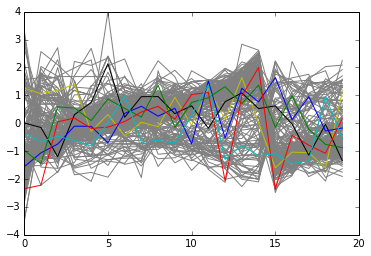

In [12]:
#plotting
plt.plot(business.T,c='grey');
for j in range(0,nk6):
    plt.plot([i[j] for i in centroids6])

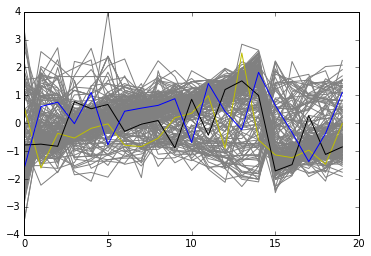

In [13]:
#try 3 clusters kmean
nk = 3
centroids3=[]
clusters3 = []
for i in range(0,business.shape[0]):
    business[i,:] = ((business[i,:] - np.mean(business[i,:]))/np.std(business[i,:]))
for j in range(0,business.shape[1]):
    cluster_centroids_3, closest_centroids_3 = kmeans2(business[:,j], nk, iter=1)
    clusters3.append(closest_centroids_3)
    centroids3.append(cluster_centroids_3)
    
plt.plot(business.T,c='grey');
for j in range(0,nk):
    plt.plot([i[j] for i in centroids3])

C:\Users\Fernando\Anaconda\lib\site-packages\scipy\cluster\vq.py:600: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


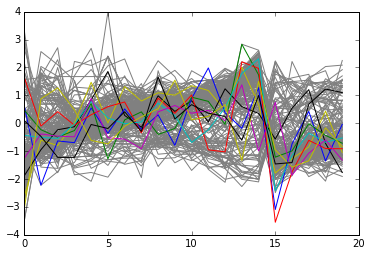

In [14]:
#try 9 clusters kmean
nk = 9
centroids9=[]
clusters9 = []
for i in range(0,business.shape[0]):
    business[i,:] = ((business[i,:] - np.mean(business[i,:]))/np.std(business[i,:]))
for j in range(0,business.shape[1]):
    cluster_centroids_9, closest_centroids_9 = kmeans2(business[:,j], nk, iter=1)
    clusters9.append(closest_centroids_9)
    centroids9.append(cluster_centroids_9)
    
plt.plot(business.T,c='grey');
for j in range(0,nk):
    plt.plot([i[j] for i in centroids9])

In [15]:
#plot in the map now
#print mydata

In [16]:
zips = pd.Series(clusters3[0])
print zips

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     0
9     0
10    2
11    0
12    2
13    2
14    0
...
228    2
229    2
230    2
231    2
232    2
233    2
234    2
235    1
236    2
237    0
238    0
239    0
240    0
241    1
242    2
Length: 243, dtype: int32


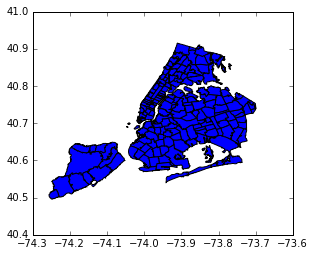

In [17]:
fig = plt.figure() 
ax = fig.gca() 
for i in zipdata['geometry']:
    ax.add_patch(PolygonPatch(i) )
ax.axis('scaled')
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

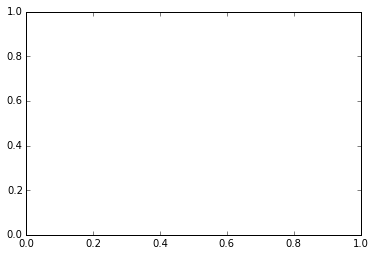

In [18]:
zips = pd.Series(clusters3[0])
cmap = matplotlib.cm.hsv(np.linspace(0,1,max(zips.values)))
fig = plt.figure() 
ax = fig.gca() 
for i in range(0,len(zipdata['geometry'])):
    ax.add_patch(PolygonPatch(zipdata['geometry'].iloc[i], fc = cmap[zips[i]]) )
ax.axis('scaled')
plt.show()

In [ ]:
print zipdata['geometry']

# Another clustering algorithm

In [ ]:
aglm_3 = AgglomerativeClustering(n_clusters=3,  
                              linkage='average', 
                              affinity='euclidean').fit(mydata)

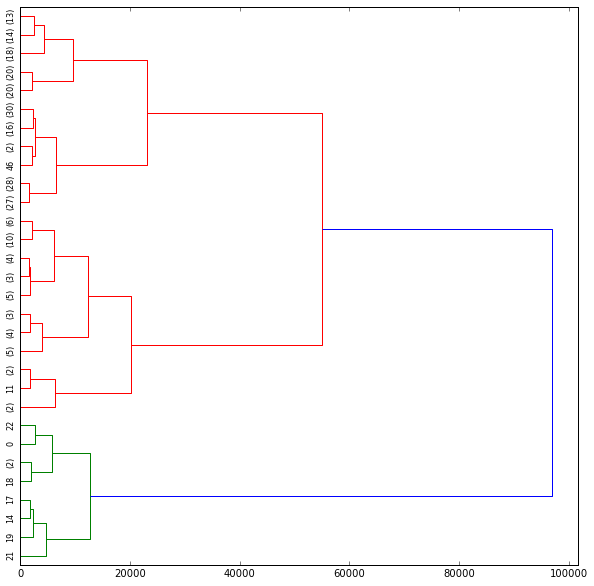

In [19]:
fig = pl.figure(figsize=(10,10))
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(mydata, method='ward'),
                               leaf_rotation=90,leaf_font_size=8,orientation='left',
                               truncate_mode='lastp')  


Conclusions: I could not plot in the map and vizualize, but from what I plotted I can say that it's difficult to analyze clusters with clustering criterias. 